In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload the dataset
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded)), sheet_name='Online Retail')


Saving Online Retail.xlsx to Online Retail (6).xlsx


Accuracy: 0.7614
Confusion Matrix:
 [[49011  5387]
 [13599 11588]]


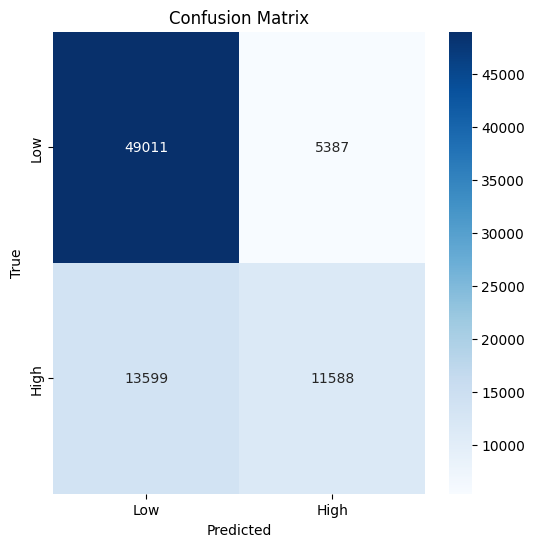

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84     54398
           1       0.68      0.46      0.55     25187

    accuracy                           0.76     79585
   macro avg       0.73      0.68      0.69     79585
weighted avg       0.75      0.76      0.75     79585



In [14]:

# Step 3: Data Preprocessing
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Drop rows with missing values in essential columns
df = df.dropna(subset=['Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country'])

# Remove transactions with a negative quantity (return items)
df = df[df['Quantity'] > 0]

# Clean the 'Description' column (lowercase, remove non-alphanumeric characters)
df['Description'] = df['Description'].str.lower()
df['Description'] = df['Description'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Remove rows with no 'Description' after cleaning
df = df.dropna(subset=['Description'])

# Step 4: Feature Extraction - Using TF-IDF for text data
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Description'])  # Features: Text data
y = df['Quantity'].apply(lambda x: 1 if x > 10 else 0)  # Target: Binary classification (high vs low quantity)

# Step 5: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)

# Print the accuracy and confusion matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display confusion matrix as a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Discussing the Results
# The model's accuracy, precision, recall, and F1-score can be used to evaluate its performance.
# You can also improve the model by experimenting with other classifiers, such as Random Forest, SVM, etc.
